In [1]:
import json
import discoursegraphs as dg

In [2]:
import pixiedust # must import in its own cell

Pixiedust database opened successfully


In [3]:
pixiedust.optOut()

Pixiedust will not collect anonymous install statistics.


In [4]:
heilman_outfpath = 'article.heilman-sagae-2015.output'

In [5]:
hsg = dg.read_hs2015(heilman_outfpath)

In [6]:
# dg.info(hsg)

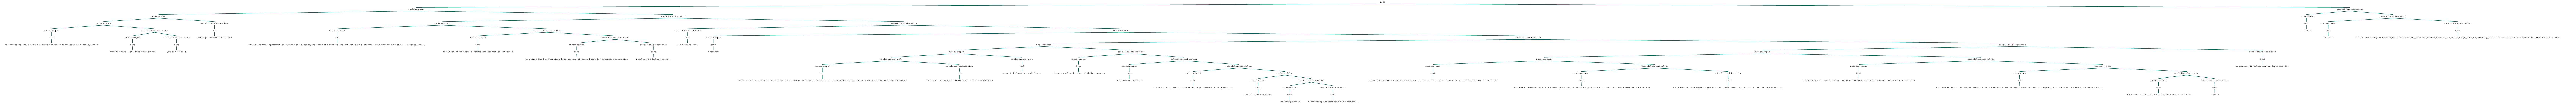

In [7]:
hsg.rst_tree

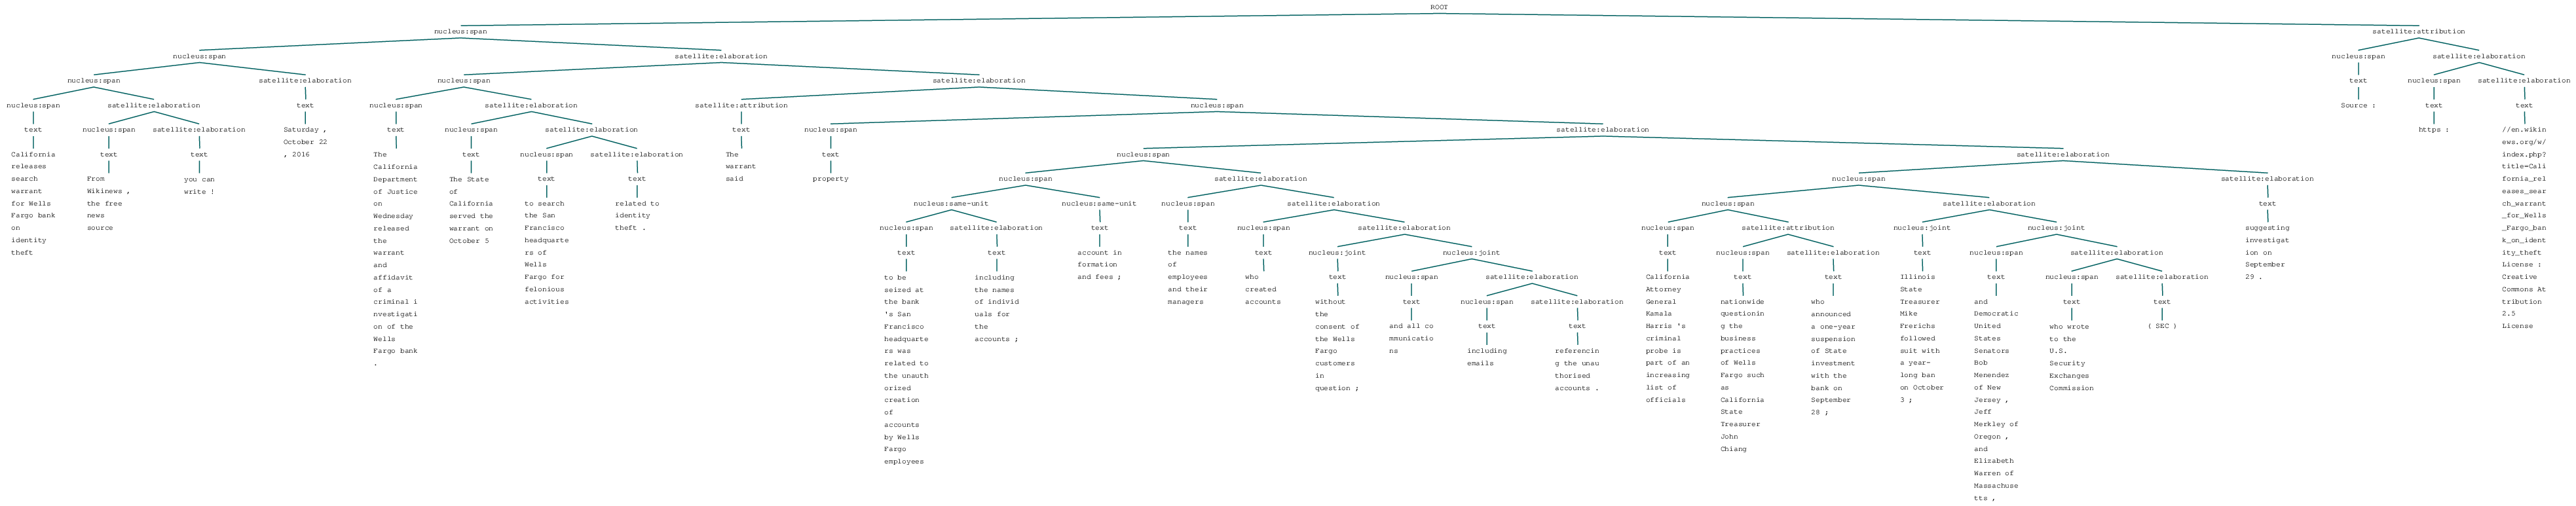

In [8]:
dg.readwrite.tree.word_wrap_tree(hsg.rst_tree, 10)

In [9]:
with open(heilman_outfpath, 'r') as parsed_file:
    heilman_json = json.load(parsed_file)

In [10]:
heilman_json.keys()

[u'scored_rst_trees', u'edu_tokens']

In [11]:
for i, edu in enumerate(heilman_json['edu_tokens']):
    print i, u' '.join(edu)

0 California releases search warrant for Wells Fargo bank on identity theft
1 From Wikinews , the free news source
2 you can write !
3 Saturday , October 22 , 2016
4 The California Department of Justice on Wednesday released the warrant and affidavit of a criminal investigation of the Wells Fargo bank .
5 The State of California served the warrant on October 5
6 to search the San Francisco headquarters of Wells Fargo for felonious activities
7 related to identity theft .
8 The warrant said
9 property
10 to be seized at the bank 's San Francisco headquarters was related to the unauthorized creation of accounts by Wells Fargo employees
11 including the names of individuals for the accounts ;
12 account information and fees ;
13 the names of employees and their managers
14 who created accounts
15 without the consent of the Wells Fargo customers in question ;
16 and all communications
17 including emails
18 referencing the unauthorised accounts .
19 California Attorney General Kamala Harri

# TODO: compare input_long.txt hs2015 parented tree vs. rs3 parented tree

In [12]:
LONG_HS2015 = "/home/arne/repos/discoursegraphs/src/discoursegraphs/data/long.hs2015"
SHORT_HS2015 = "/home/arne/repos/discoursegraphs/src/discoursegraphs/data/short.hs2015"
LONG_HILDA = "/home/arne/repos/discoursegraphs/src/discoursegraphs/data/long.hilda"

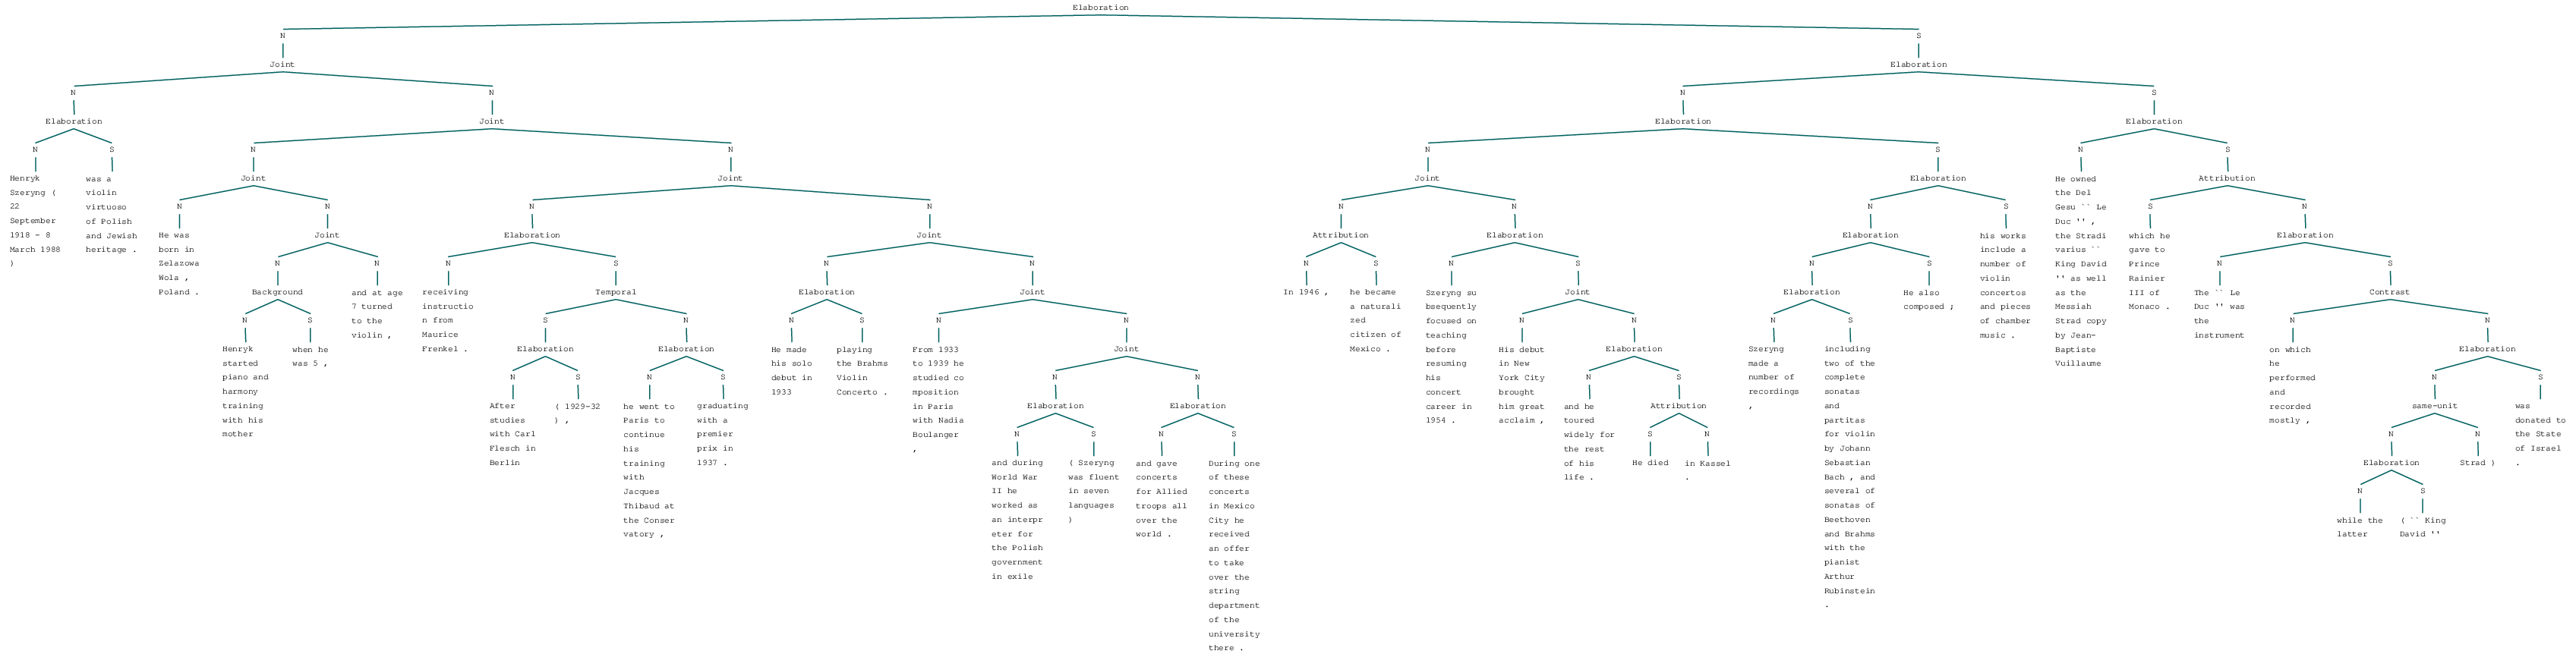

In [13]:
dg.read_hilda(LONG_HILDA, word_wrap=10)

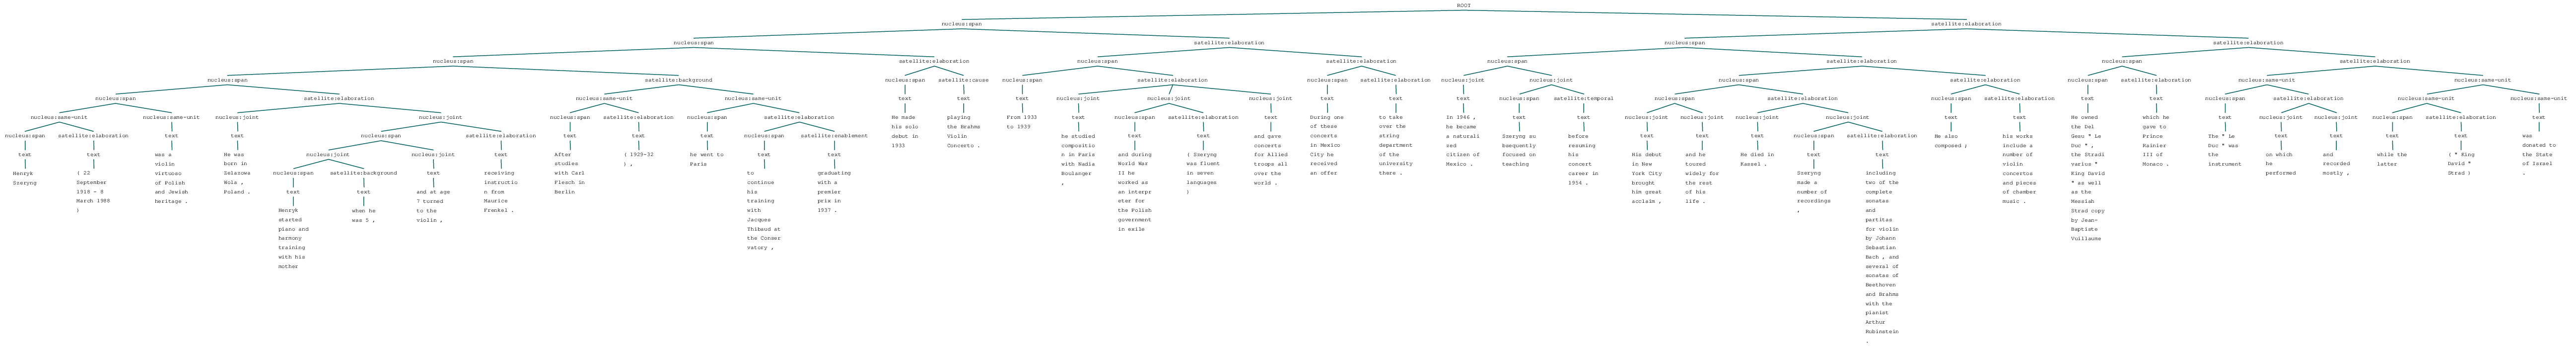

In [14]:
long_hsg = dg.read_hs2015(LONG_HS2015)
dg.readwrite.tree.word_wrap_tree(long_hsg.rst_tree, 10)


In [ ]:
%%pixie_debugger
short_hst = dg.read_hs2015tree(SHORT_HS2015)
# dg.readwrite.tree.word_wrap_tree(short_hsg.rst_tree, 10)


In [16]:
# long_hsg.get_tree_type(long_hsg.rst_tree)
short_hst[0][0]

NameError: name 'short_hsg' is not defined

In [ ]:
short_hsg.rst_tree.pretty_print()

In [ ]:
print type(heilman_json['scored_rst_trees'])
print len(heilman_json['scored_rst_trees'])

In [ ]:
rst_tree = heilman_json['scored_rst_trees'][0]

In [ ]:
rst_tree.keys()

In [ ]:
tree = rst_tree['tree']

In [ ]:
tree

In [ ]:
import nltk

In [ ]:
nltk_tree = nltk.ParentedTree.fromstring(tree)

In [ ]:
# nltk_tree

In [ ]:
#nltk_tree.productions()

In [ ]:
nltk_tree.label()

In [ ]:
for subtree in nltk_tree:
    print subtree.label()

In [ ]:
# def get_tree_structure(tree, indent=0):
#     if isinstance(tree, nltk.tree.ParentedTree):
#         ret_str = "{0} {1}\n".format(' '*indent, tree.label())
#         for subtree in tree:
#             ret_str += get_tree_structure(subtree, indent=indent+1)

#     else:
#         ret_str = "{0} {1}\n".format(' '*indent, tree)
#     return ret_str

In [ ]:
# print get_tree_structure(nltk_tree)

In [ ]:
# nltk_tree[1]

In [ ]:
nucleus_span = nltk_tree[1][0]
# nucleus_span

In [ ]:
# nucleus_span[0][0] = 'foo bar'

In [ ]:
# nucleus_span

In [ ]:
# nltk_tree[1]

In [ ]:
%load_ext gvmagic

In [ ]:
%dotstr dg.print_dot(hsg)